# EDA with our first model

In [134]:
import pickle
import pandas as pd
import numpy as np
import src.nlp as nlp
from pprint import pprint
import matplotlib.pyplot as plt

In [2]:
def unpickle(filename: str):
    """Returns the unpickled object from the file.
    """
    with open(filename, 'rb') as p:
        item = pickle.load(p)
    return item

In [53]:
beer_df, reviews_df = nlp.load_data('data/beers.csv', 'data/reviews.csv')

reviews_df['text'] = [nlp.remove_bad_text(text) for text in reviews_df['text'].values]

In [3]:
W = unpickle('pickles/W.pkl')
NMF = unpickle('pickles/NMF.pkl')
TFIDF_Vectorizer = unpickle('pickles/TF-IDF-Vectorizer.pkl')
TFIDF = unpickle('pickles/TF-IDF.pkl')

## Find the keywords associated with each topic

Let's find the top 10 words associated with our top ten topics.

In [23]:
topic_vectors = NMF.components_
feature_names = TFIDF_Vectorizer.get_feature_names()

In [72]:
def get_top_15_topics_words(topic_vectors, feature_names):
    top_words = []
    for idx in range(15):
        top_words.append(get_top_words(topic_vectors[idx], feature_names))
    return top_words
    
def get_top_words(topic_vector, feature_names):
    top_words_idxs = np.argsort(topic_vector)[-1:-16:-1]
    top_words = [feature_names[idx] for idx in top_words_idxs]
    return top_words

In [73]:
top_15 = get_top_15_topics_words(topic_vectors, feature_names)

In [74]:
for topic in top_15:
    print(topic)

['hop', 'malt', 'bit', 'caramel', 'bal', 'flav', 'fin', 'amb', 'arom', 'sweet', 'flor', 'slight', 'earthy', 'dry', 'wel']
['coff', 'chocol', 'roast', 'black', 'stout', 'dark', 'port', 'malt', 'creamy', 'tan', 'brown', 'roasty', 'bit', 'flav', 'coco']
['on', 'lik', 'real', 'get', 'ev', 'brew', 'would', 'much', 'tim', 'try', 'first', 'look', 'think', 'way', 'com']
['dark', 'brown', 'fruit', 'caramel', 'sug', 'sweet', 'alcohol', 'raisin', 'toff', 'malt', 'plum', 'rich', 'warm', 'fig', 'red']
['sour', 'tart', 'cherry', 'funk', 'acid', 'red', 'oak', 'vineg', 'appl', 'raspberry', 'funky', 'dry', 'win', 'grap', 'fruit']
['citr', 'orang', 'grapefruit', 'pin', 'ip', 'trop', 'pineappl', 'mango', 'fruit', 'whit', 'bit', 'hazy', 'juicy', 'hop', 'resin']
['yeast', 'banan', 'clov', 'whe', 'belg', 'spic', 'spicy', 'whit', 'fru', 'gold', 'cloudy', 'yeasty', 'hazy', 'lemon', 'appl']
['bourbon', 'vanill', 'oak', 'barrel', 'ag', 'boozy', 'not', 'coconut', 'mapl', 'toff', 'chocol', 'whiskey', 'caramel', '

## Find the top 10 reviews associated with each topic

In [43]:
top_reviews_idx = np.argsort(W[:, 0])[-1:-11:-1]

In [58]:
reviews_df.iloc[top_reviews_idx]

,author,beer,feel,look,overall,review_id,smell,taste,text,brew_beer,review_num
26558,/community/members/michaelcbyrnes.738649/,smuttynose shoals pale ale,4.75,4.50,4.75,smuttynose brewing company smuttynose shoals p...,4.75,4.75,"A: copper, golden red with foamy white head a ...",smuttynose brewing company smuttynose shoals p...,39
311963,/community/members/paco1029384756.203924/,nosferatu,4.50,4.50,4.00,great lakes brewing co. nosferatu 632,4.00,4.00,"Pours a deep ruby color with a very small, smo...",great lakes brewing co. nosferatu,632
209708,/community/members/okbrew89.732424/,marble red ale,3.75,4.25,4.00,marble brewery marble red ale 14,4.00,4.00,Poured into a pint glass. Reddish amber color ...,marble brewery marble red ale,14
349649,/community/members/winter.906/,fuller's london pride,3.50,4.00,4.00,fuller smith & turner plc fuller's london prid...,4.00,4.00,Poured a clear amber in color with an off-whit...,fuller smith & turner plc fuller's london pride,1065
571079,/community/members/ttroha.706624/,double bastard ale,NaN,NaN,NaN,arrogant consortia double bastard ale 142,NaN,NaN,Tap from Maltitude. Pours cloudy amber with wh...,arrogant consortia double bastard ale,142
634358,/community/members/samp01.479260/,dead guy ale,3.50,4.00,4.00,rogue ales dead guy ale 796,3.50,4.00,Pours a cloudy copper with a nice creamy off w...,rogue ales dead guy ale,796
215100,/community/members/ngeunit1.348087/,homegrown fresh hop ale,4.00,4.00,4.00,moonlight brewing company homegrown fresh hop ...,4.50,4.50,A - Served a clear copper-amber color with a f...,moonlight brewing company homegrown fresh hop ale,5
123225,/community/members/zacht.750791/,hermann's dark lager,4.50,3.50,3.75,vancouver island brewing hermann's dark lager 2,3.50,3.75,"A: Ruby brown color, clear, about a finger of ...",vancouver island brewing hermann's dark lager,2
52221,/community/members/stephenjmoore.568544/,james black ale,4.25,4.50,4.50,hill farmstead brewery james black ale 28,4.75,4.50,A- Very dark brown body with a bubbly tan head...,hill farmstead brewery james black ale,28
500920,/community/members/ngeunit1.348087/,smuttynose shoals pale ale,4.00,4.00,4.00,smuttynose brewing company smuttynose shoals p...,4.00,4.50,A - Pours a bright slightly haze copper-orange...,smuttynose brewing company smuttynose shoals p...,167


In [60]:
def get_all_topics_top_ten(W, reviews_df):
    topics = []
    for idx in range(W.shape[1]):
        topics.append(get_top_ten_reviews(W, idx, reviews_df))
    return topics

def get_top_ten_reviews(W, topic_idx, reviews_df):
    top_reviews_idx = np.argsort(W[:, topic_idx])[-1:-11:-1]
    return reviews_df.iloc[top_reviews_idx]

In [61]:
top_ten_reviews_by_topic = get_all_topics_top_ten(W, reviews_df)

In [71]:
for topic in top_ten_reviews_by_topic:
    print(topic[['beer', 'overall']])
    print()

                              beer  overall
26558   smuttynose shoals pale ale     4.75
311963                   nosferatu     4.00
209708              marble red ale     4.00
349649       fuller's london pride     4.00
571079          double bastard ale      NaN
634358                dead guy ale     4.00
215100     homegrown fresh hop ale     4.00
123225        hermann's dark lager     3.75
52221              james black ale     4.50
500920  smuttynose shoals pale ale     4.00

                           beer  overall
184486                  unjunct     4.00
478856                    stout     4.00
648988      beer geek breakfast     4.00
673801     coffee oatmeal stout     4.00
698545  bean me up coffee stout     4.25
603138     cafe con leche stout     4.00
496191                     bdcs     4.25
614073               kaffestout     4.50
560972             mocha marlin     4.00
692378      beer geek breakfast     4.00

                                              beer  overall
533

## Hierarchical Clustering
Here I'll take the mean review vector for each beer and cluster the beers.

The first step is to calculate the topic vector for each beer. To do this we will produce a topic vector for the beer based on a TF-IDF vector for text comprising all the reviews associated with that beer.

In [267]:
beer_df, reviews_df = nlp.load_data('data/beers.csv', 'data/reviews.csv', 500)


In [ ]:
two_hearted = beer_df[beer_df['beer'] == 'two hearted ale']['review_id'].iloc[0]

In [154]:
two_hearted_reviews = reviews_df[reviews_df['brew_beer']==two_hearted]
two_hearted_reviews.head(2)

,author,beer,feel,look,overall,review_id,smell,taste,text,brew_beer,review_num
315,/community/members/kendo.56471/,two hearted ale,4.5,4.5,5.0,bell's brewery - eccentric café & general stor...,4.5,4.5,4.6/5 rDev +7.7%look: 4.5 | smell: 4.5 | tast...,bell's brewery - eccentric café & general stor...,2213
412,/community/members/elmocoso.1146/,two hearted ale,5.0,4.5,5.0,bell's brewery - eccentric café & general stor...,4.5,4.5,4.65/5 rDev +8.9%look: 4.5 | smell: 4.5 | tas...,bell's brewery - eccentric café & general stor...,3600


In [155]:
two_hearted_texts = two_hearted_reviews['text'].values
two_hearted_texts = nlp.clean_documents(two_hearted_texts)

In [159]:
two_hearted_text = ' '.join(list(two_hearted_texts))

In [162]:
two_hearted_tfidf = TFIDF_Vectorizer.transform([two_hearted_text])

In [181]:
two_hearted_tfidf.toarray().shape

(1, 5000)

In [172]:
NMF.components_.shape

(15, 5000)

In [176]:
vector = two_hearted_tfidf.dot(NMF.components_.T)

In [177]:
vector.shape

(1, 15)

In [179]:
vector

array([[6.92170801, 1.53932432, 4.67612745, 2.31016219, 1.51395133,
        6.07888996, 2.52513984, 0.79055697, 2.41459247, 0.51903357,
        3.73769884, 3.74689513, 2.80610606, 2.2497328 , 1.84723804]])

In [268]:
def get_beer_mega_review(brew_beer: str, reviews_df: pd.DataFrame):
    """Return a string of the reviews associated with the given beer.
    """
    reviews = reviews_df[reviews_df['brew_beer']==brew_beer]
    texts = reviews['text'].values
    texts = nlp.clean_documents(texts)
    return ' '.join(list(texts))

def get_all_beer_tf_idf(brew_beers: list, reviews_df: pd.DataFrame, tfidf_vectorizer):
    """Return the tf_idf matrix for all the beers listed.
    """
    
    reviews = [get_beer_mega_review(brew_beer, reviews_df) for brew_beer in brew_beers]
    return tfidf_vectorizer.transform(reviews)

In [269]:
brew_beers = beer_df['review_id']

In [270]:
tf_idf = get_all_beer_tf_idf(brew_beers, reviews_df, TFIDF_Vectorizer)

In [271]:
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import linkage, dendrogram

In [272]:
distxy = squareform(pdist(tf_idf.todense(), metric='cosine'))

In [273]:
link = linkage(distxy, method='complete')

/Users/brettcastellanos/miniconda3/envs/craft-beer/lib/python3.7/site-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


/Users/brettcastellanos/miniconda3/envs/craft-beer/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/brettcastellanos/miniconda3/envs/craft-beer/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 158 missing from current font.
  font.set_text(s, 0, flags=flags)


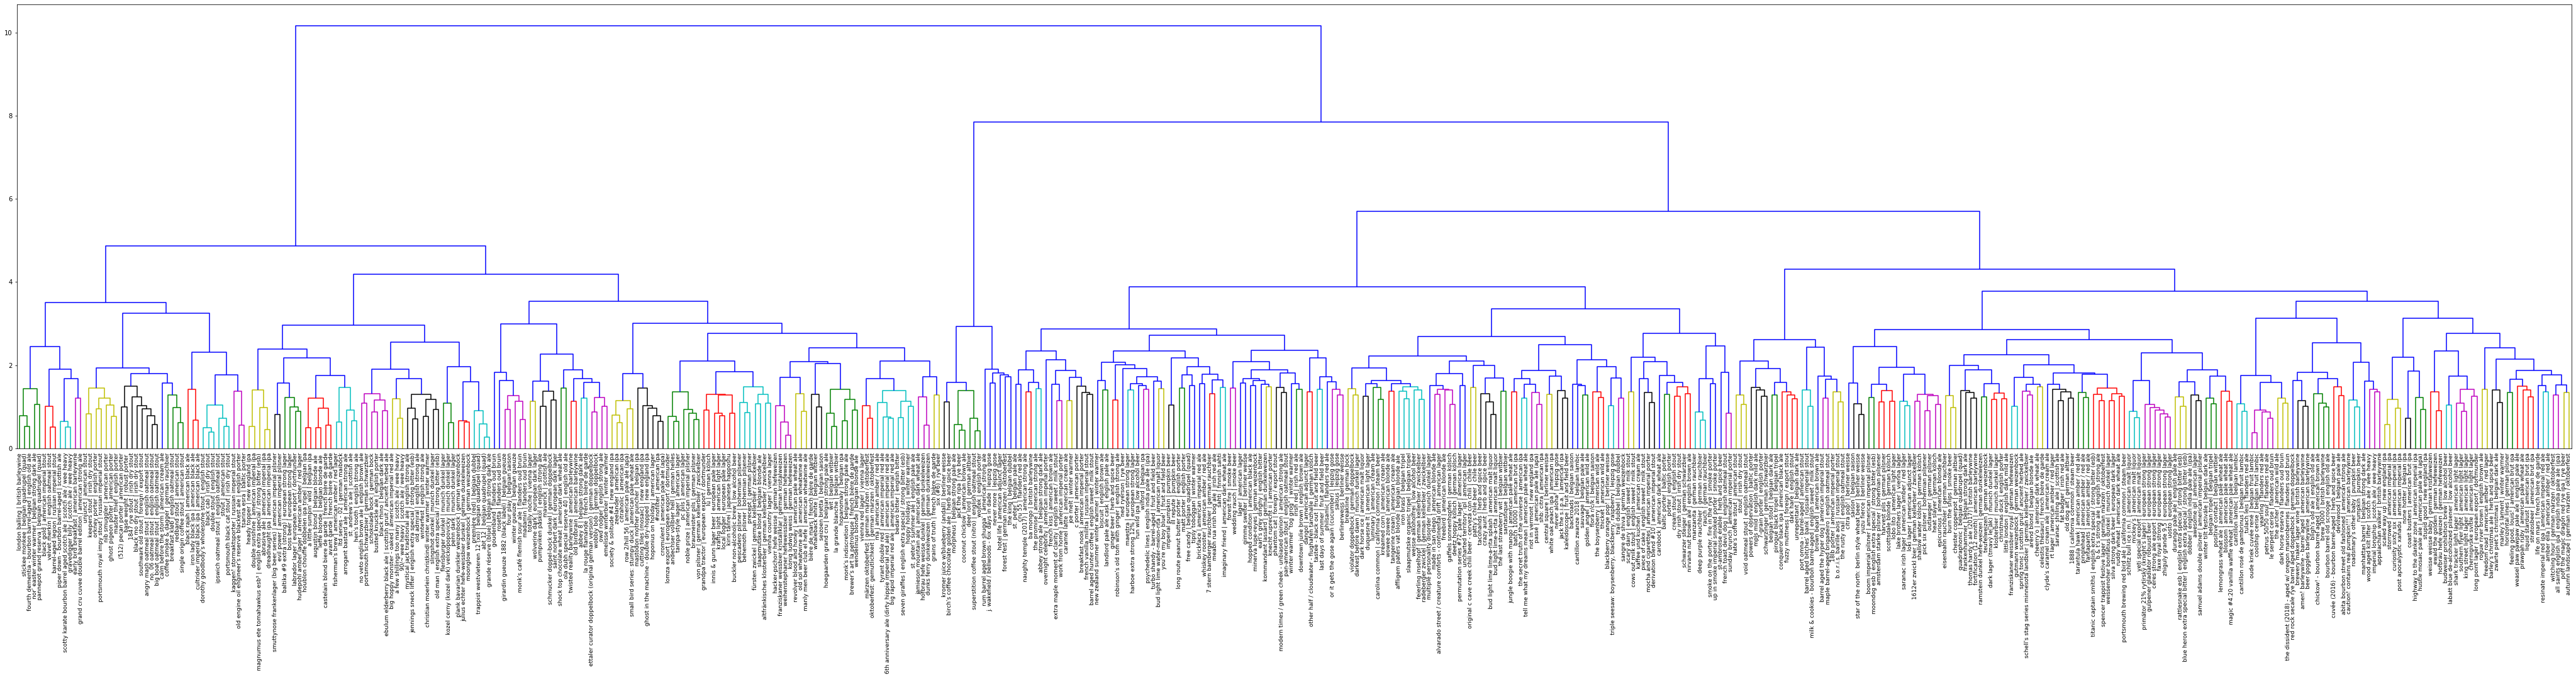

In [274]:
labels = beer_df['beer'].values + ' | ' + beer_df['style']

fig =plt.figure(figsize=(60,20))
dendro = dendrogram(
    link, color_threshold=1.5, leaf_font_size=9,
    labels=labels.values, # orientation='right'
)
plt.subplots_adjust(top=.99, bottom=0.5, left=0.05, right=0.99)
plt.savefig('figure1')
plt.show()